#### This notebook documents the data cleaning process for an online retail dataset.  
#### The dataset contains transactional data of an e-commerce retailer, where each row represents an item in an invoice.  
#### The goal is to prepare the data by addressing missing values, inconsistent entries, and logical errors, then analyze and segment the data to identify the most valuable customers.

# Cleaning

In [787]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\caleb\OneDrive\Desktop\Data\marketing_data_cleaning\Online Retail.xlsx', engine='openpyxl')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Standardize column names for consistency and easier coding

In [788]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#### CustomerID should be converted to string since it is a persistent ID, not a number

In [789]:
df['customerid'] = df['customerid'].astype('Int64').astype('string').str.strip()

#### Review summary statistics to identify possible issues

In [790]:
df.describe(include='all').T

C:\Users\caleb\AppData\Local\Temp\ipykernel_1828\377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
invoiceno,541909.0,25900.0,573585.0,1114.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stockcode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,541909.0,NaN,NaN,NaN,NaT,NaT,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
invoicedate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unitprice,541909.0,NaN,NaN,NaN,NaT,NaT,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
customerid,406829,4372,17841,7983,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### InvoiceNo's data type is string but summary statistics return float so it's acting like a number. Let's enforce proper data types

In [791]:
for col in df.columns:
    dtype = df[col].dtype

    if pd.api.types.is_object_dtype(dtype):
        df[col] = df[col].astype('string')

    elif pd.api.types.is_integer_dtype(dtype):
        df[col] = df[col].astype('Int64')

    elif pd.api.types.is_float_dtype(dtype):
        df[col] = df[col].astype('float64')

    elif pd.api.types.is_datetime64_any_dtype(dtype):
        df[col] = pd.to_datetime(df[col], errors='coerce')

    elif pd.api.types.is_bool_dtype(dtype):
        df[col] = df[col].astype('boolean')

#### Check for missing values

In [792]:
df.isna().sum().sort_values(ascending=False)

customerid     135080
description      1454
invoiceno           0
stockcode           0
quantity            0
invoicedate         0
unitprice           0
country             0
dtype: int64

#### What do the records with missing CustomerID look like?

In [793]:
df[df['customerid'].isna()].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,<NA>,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom


#### Remove records with missing CustomerID since we can't attribute sales without it

In [794]:
df = df.dropna(subset=['customerid'])

#### Ensure each invoice number has one consistent date

In [795]:
df['invoicedate'] = df.groupby('invoiceno')['invoicedate'].transform('min')

#### Remove duplicate records

In [796]:
print(len(df[df.duplicated()]))
df = df.drop_duplicates()

5226


#### Clean inconsistent capitalization and spacing in product descriptions

In [797]:
df['description'] = (
    df['description']
    .str.strip()
    .str.lower()
    .replace('nan', pd.NA)
)

In [798]:
print(df.isna().sum())
df.describe()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64


,quantity,unitprice
count,401603.000000,401603.000000
mean,12.183298,3.474067
std,250.283348,69.764122
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [799]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [855]:
len(df)

401603

#### Invoiceno starting with 'C' represent cancelations. Let's create separate datasets

In [773]:
sales = df[df['invoiceno'].str[0] != 'C']
cancelations = df[df['invoiceno'].str[0] == 'C']

#### Export cleaned invoice datasets

In [774]:
df.to_csv(r'C:\Users\caleb\OneDrive\Desktop\Data\marketing_data_cleaning\online_retail_cleaned.csv', index=False)
sales.to_csv(r'C:\Users\caleb\OneDrive\Desktop\Data\marketing_data_cleaning\online_retail_sales_cleaned.csv', index=False)
cancelations.to_csv(r'C:\Users\caleb\OneDrive\Desktop\Data\marketing_data_cleaning\online_retail_cancelations_cleaned.csv', index=False)

# Segmentation

#### Add useful columns for analysis

In [834]:
import datetime as dt

df['recency'] = (pd.Timestamp.today().normalize() - df['invoicedate']).dt.days

df['sale'] = np.where(df['invoiceno'].str[0] != 'C', 1, 0)
df['cancelation'] = np.where(df['invoiceno'].str[0] == 'C', 1, 0)

df['revenue'] = df['quantity'] * df['unitprice']

#### RFM Segmentation (Recency, Frequency, Monetary)

In [835]:
rfm = df.groupby(['customerid']).agg(
    recency=('recency', 'min'),
    sales=('sale', 'sum'),
    cancelations=('cancelation', 'sum'),
    monetary=('revenue', 'sum')
).reset_index()

rfm['frequency'] = rfm['sales'] - rfm['cancelations']

rfm

,customerid,recency,sales,cancelations,monetary,frequency
0,12346,5424,1,1,0.0,0
1,12347,5101,182,0,4310.0,182
2,12348,5174,31,0,1797.24,31
3,12349,5117,73,0,1757.55,73
4,12350,5409,17,0,334.4,17
...,...,...,...,...,...,...
4367,18280,5376,10,0,180.6,10
4368,18281,5279,7,0,80.82,7
4369,18282,5106,12,1,176.6,11
4370,18283,5102,721,0,2045.53,721


In [836]:
rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=[1, 2, 3, 4])
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = pd.qcut(rfm['frequency'], 4, labels=[4, 3, 2, 1])
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, labels=[4, 3, 2, 1])
rfm['m_score'] = rfm['m_score'].astype(int)

rfm['rfm'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

In [837]:
rfm['rfm'].unique()

array([12,  3,  7,  5, 10,  6,  8, 11,  4,  9])

In [838]:
rfm['rfm_score'] = 0
rfm.loc[(rfm['rfm'].isin([12, 11])), 'rfm_score'] = 1
rfm.loc[(rfm['rfm'].isin([10, 9])), 'rfm_score'] = 2
rfm.loc[(rfm['rfm'].isin([8, 7])), 'rfm_score'] = 3
rfm.loc[(rfm['rfm'].isin([6, 5])), 'rfm_score'] = 4
rfm.loc[(rfm['rfm'].isin([4, 3])), 'rfm_score'] = 5

#### K-Means Clustering

In [839]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [840]:
features = rfm[['recency', 'frequency', 'monetary']]

In [841]:
# Normalize values so no one feature dominates
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

In [842]:
# Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['cluster'] = kmeans.fit_predict(scaled)

<AxesSubplot:xlabel='recency', ylabel='monetary'>

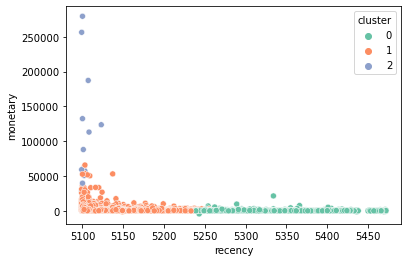

In [843]:
import seaborn as sns
sns.scatterplot(x='recency', y='monetary', hue='cluster', data=rfm, palette='Set2')

In [844]:
rfm['k_score'] = rfm['cluster'].replace({0:1, 1:2, 2:3})

#### Combine RFM and K Segmentation into composite score

In [845]:
rfm['customer_score'] = rfm['rfm_score'] + rfm['k_score']

In [846]:
rfm['rfm_score'].value_counts()

2    982
3    912
4    852
5    839
1    787
Name: rfm_score, dtype: int64

In [847]:
rfm['k_score'].value_counts()

2    3259
1    1100
3      13
Name: k_score, dtype: int64

In [848]:
rfm['customer_score'].value_counts()

6    836
7    826
5    819
4    733
2    617
3    528
8     13
Name: customer_score, dtype: int64

In [849]:
rfm.head()

,customerid,recency,sales,cancelations,monetary,frequency,r_score,f_score,m_score,rfm,rfm_score,cluster,k_score,customer_score
0,12346,5424,1,1,0.0,0,4,4,4,12,1,0,1,2
1,12347,5101,182,0,4310.0,182,1,1,1,3,5,1,2,7
2,12348,5174,31,0,1797.24,31,3,3,1,7,3,1,2,5
3,12349,5117,73,0,1757.55,73,2,2,1,5,4,1,2,6
4,12350,5409,17,0,334.4,17,4,3,3,10,2,0,1,3


In [859]:
rfm[['rfm_score', 'k_score', 'customerid']].groupby(['rfm_score', 'k_score']).count().rename(columns={'customerid':'count'}).sort_values(by=['rfm_score', 'k_score']).reset_index()

,rfm_score,k_score,count
0,1,1,617
1,1,2,170
2,2,1,358
3,2,2,624
4,3,1,109
5,3,2,803
6,4,1,16
7,4,2,836
8,5,2,826
9,5,3,13


In [850]:
df = df.merge(rfm[['customerid', 'rfm_score', 'k_score', 'customer_score']], how='left', on=['customerid'])

#### Create customer dataset

In [860]:
cust = df.groupby(['customerid']).agg(
    rfm_score=('rfm_score', 'first'),
    k_score=('k_score', 'first'),
    customer_score=('customer_score', 'first'),
    invoices=('invoiceno', 'count'),
    quantity=('quantity', 'sum'),
    avgunitprice=('unitprice', 'mean'),
    revenue=('revenue', 'sum'),
    sales=('sale', 'sum'),
    cancelations=('cancelation', 'sum'),
).reset_index()

cust

,customerid,rfm_score,k_score,customer_score,invoices,quantity,avgunitprice,revenue,sales,cancelations
0,12346,1,1,2,2,0,1.040000,0.0,1,1
1,12347,5,2,7,182,2458,2.644011,4310.0,182,0
2,12348,3,2,5,31,2341,5.764839,1797.24,31,0
3,12349,4,2,6,73,631,8.289041,1757.55,73,0
4,12350,2,1,3,17,197,3.841176,334.4,17,0
...,...,...,...,...,...,...,...,...,...,...
4367,18280,1,1,2,10,45,4.765000,180.6,10,0
4368,18281,1,1,2,7,54,5.622857,80.82,7,0
4369,18282,2,2,4,13,98,4.821538,176.6,12,1
4370,18283,5,2,7,721,1357,1.628752,2045.53,721,0


#### Export cleaned and aggregated customer dataset

In [864]:
cust.to_csv(r'C:\Users\caleb\OneDrive\Desktop\Data\marketing_data_cleaning\online_retail_customers_cleaned.csv', index=False)

#### Summarize sales by RFM Score

In [861]:
rfm_sum = cust.groupby(['rfm_score']).agg(
    customers=('customerid', 'count'),
    invoices=('invoices', 'sum'),
    quantity=('quantity', 'sum'),
    revenue=('revenue', 'sum'),
    avgquantity=('quantity', 'mean'),
    avgrevenue=('revenue', 'mean'),
    avgunitprice=('avgunitprice', 'mean'),
    sales=('sales', 'sum'),
    cancelations=('cancelations', 'sum')
).reset_index()

rfm_sum['final_sales'] = rfm_sum['sales'] - rfm_sum['cancelations']
rfm_sum['cancelation_rate'] = rfm_sum['cancelations'] / rfm_sum['sales']

rfm_sum = rfm_sum.sort_values(by=['rfm_score'], ascending=[False])

rfm_sum

,rfm_score,customers,invoices,quantity,revenue,avgquantity,avgrevenue,avgunitprice,sales,cancelations,final_sales,cancelation_rate
4,5,839,243715,3212629,5569919.58,3829.116806,6638.759928,3.310335,238305,5410,232895,0.022702
3,4,852,81734,840864,1393081.782,986.929577,1635.072514,3.292070,80174,1560,78614,0.019458
2,3,912,43410,483347,771541.9,529.985746,845.988925,6.053693,42553,857,41696,0.020140
1,2,982,23902,275718,411963.662,280.771894,419.514931,12.005296,23413,489,22924,0.020886
0,1,787,8842,80291,132008.6,102.021601,167.736468,15.257079,8286,556,7730,0.067101


#### Summarize sales by K Score

In [862]:
k_sum = cust.groupby(['k_score']).agg(
    customers=('customerid', 'count'),
    invoices=('invoices', 'sum'),
    quantity=('quantity', 'sum'),
    revenue=('revenue', 'sum'),
    avgquantity=('quantity', 'mean'),
    avgrevenue=('revenue', 'mean'),
    avgunitprice=('avgunitprice', 'mean'),
    sales=('sales', 'sum'),
    cancelations=('cancelations', 'sum')
).reset_index()

k_sum['final_sales'] = k_sum['sales'] - k_sum['cancelations']
k_sum['cancelation_rate'] = k_sum['cancelations'] / k_sum['sales']

k_sum = k_sum.sort_values(by=['k_score'], ascending=[False])

k_sum

,k_score,customers,invoices,quantity,revenue,avgquantity,avgrevenue,avgunitprice,sales,cancelations,final_sales,cancelation_rate
2,3,13,35405,793316,1473638.11,61024.307692,113356.777692,4.631064,34610,795,33815,0.022970
1,2,3259,336115,3813865,6296728.963,1170.256214,1932.104622,4.161140,328824,7291,321533,0.022173
0,1,1100,30083,285668,508148.451,259.698182,461.953137,19.343952,29297,786,28511,0.026829


#### Summarize sales by Customer Score

In [863]:
cust_sum = cust.groupby(['customer_score']).agg(
    customers=('customerid', 'count'),
    invoices=('invoices', 'sum'),
    quantity=('quantity', 'sum'),
    revenue=('revenue', 'sum'),
    avgquantity=('quantity', 'mean'),
    avgrevenue=('revenue', 'mean'),
    avgunitprice=('avgunitprice', 'mean'),
    sales=('sales', 'sum'),
    cancelations=('cancelations', 'sum')
).reset_index()

cust_sum['final_sales'] = cust_sum['sales'] - cust_sum['cancelations']
cust_sum['cancelation_rate'] = cust_sum['cancelations'] / cust_sum['sales']

cust_sum = cust_sum.sort_values(by=['customer_score'], ascending=[False])

cust_sum

,customer_score,customers,invoices,quantity,revenue,avgquantity,avgrevenue,avgunitprice,sales,cancelations,final_sales,cancelation_rate
6,8,13,35405,793316,1473638.11,61024.307692,113356.777692,4.631064,34610,795,33815,0.022970
5,7,826,208310,2419313,4096281.47,2928.950363,4959.178535,3.289549,203695,4615,199080,0.022656
4,6,836,79286,815479,1344002.771,975.453349,1607.658817,3.285534,77795,1491,76304,0.019166
3,5,819,37457,430028,677875.051,525.064713,827.686265,6.298963,36659,798,35861,0.021768
2,4,733,20211,235381,343652.092,321.120055,468.829593,3.842099,19807,404,19403,0.020397
1,3,528,13792,136794,237799.88,259.079545,450.378561,18.927577,13399,393,13006,0.029331
0,2,617,7142,62538,105266.15,101.358185,170.609643,18.487451,6766,376,6390,0.055572


## RFM, K and Customer Scores effectively rank customer value. Retargeting campaigns can prioritize customers with higher Customer Scores to maximize return